In [7]:
F = len('Patryk')
L = len('Tomaszewski')
N = (F+L)*100

In [1]:
!pip install --upgrade cmdstanpy
!install_cmdstan

Installing CmdStan version: 2.29.2
Install directory: /root/.cmdstan
CmdStan version 2.29.2 already installed


In [2]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# exercise 1

model1 = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /content/code_1.stan to exe file /content/code_1
INFO:cmdstanpy:compiled model executable: /content/code_1


In [5]:
model2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:compiling stan file /content/code_2.stan to exe file /content/code_2
INFO:cmdstanpy:compiled model executable: /content/code_2


In [8]:
stan_data =  {'N':N}
samples_model1 = model1.sample(data=stan_data)
samples_model2 = model2.sample(data=stan_data)

y1 = samples_model1.stan_variable(var='y')
y2 = samples_model2.stan_variable(var='y')

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [10]:
# exercise 2

model3 = CmdStanModel(stan_file='code_3.stan')
model4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:compiling stan file /content/code_3.stan to exe file /content/code_3
INFO:cmdstanpy:compiled model executable: /content/code_3
INFO:cmdstanpy:compiling stan file /content/code_4.stan to exe file /content/code_4
INFO:cmdstanpy:compiled model executable: /content/code_4


In [13]:
stan_data3={'N': N, 'y': y1[0]}

fit3 = model3.sample(data=stan_data3)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [11]:
stan_data4={'N': N, 'y': y2[0]}
fit4 = model4.sample(data=stan_data4)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:812: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


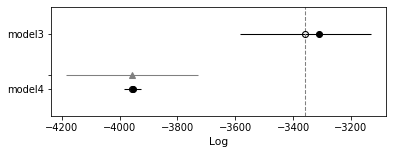

In [14]:
compare_dict = {"model3" : fit3, "model4" : fit4}
model34_loo=az.compare(compare_dict, ic='loo')
az.plot_compare(model34_loo)

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1637: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


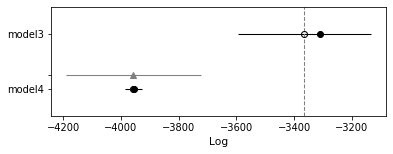

In [15]:
model34_waic = az.compare(compare_dict, ic='waic')
az.plot_compare(model34_waic)

In [16]:
model34 = az.compare(compare_dict)

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:812: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


In [17]:
# exercise 3

model5 = CmdStanModel(stan_file='code_5.stan')


INFO:cmdstanpy:compiling stan file /content/code_5.stan to exe file /content/code_5
INFO:cmdstanpy:compiled model executable: /content/code_5


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


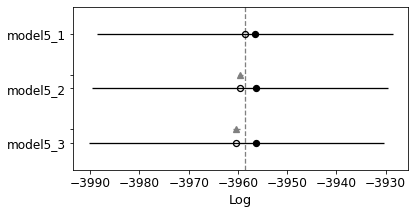

In [18]:
y_hat=fit4.stan_variable('y_hat')
X1=y_hat[0:1].transpose() 
data5_1= {'N':N, 'K':1, 'y':y2[0] , 'X':X1 }
fit5_1=model5.sample(data=data5_1)
X2=y_hat[0:2].transpose()
data5_2 = {'N':N, 'K':2, 'y':y2[0] , 'X':X2 }
fit5_2=model5.sample(data=data5_2)
X3=y_hat[0:3].transpose()
data5_3 = {'N':N, 'K':3, 'y':y2[0] , 'X':X3 }
fit5_3=model5.sample(data=data5_3)

compare_dict2 = {"model5_1" : fit5_1, "model5_2" : fit5_2, "model5_3": fit5_3}
model5_loo=az.compare(compare_dict2, ic='loo')
az.plot_compare(model5_loo)

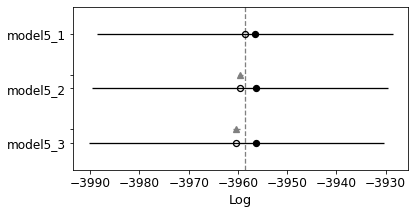

In [19]:
model5_waic=az.compare(compare_dict2, ic='waic')
az.plot_compare(model5_waic)